In [1]:
import scanpy as sc
import anndata as ad
import scib
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [2]:
# From https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html
mm = 1/25.4  # millimeters in inches

In [3]:
# overwrite scanpy/matplotlib default font: chose: Arial

In [4]:
# Need to remove chached fonts

In [5]:
! rm ~/.cache/matplotlib -rf

In [6]:
font_dirs = ["/fast/AG_Ohler/prauten/conda_envs/scib_no_defaults/fonts"]  # The path to the custom font file.

font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [7]:
# change font
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"

In [8]:
plt.rcParams['lines.markersize'] = 1.0

In [9]:
# Set font sizes
mpl.rcParams['font.size'] = 7
mpl.rcParams['axes.labelsize'] = 7
mpl.rcParams['xtick.labelsize'] = 7
mpl.rcParams['ytick.labelsize'] = 7
mpl.rcParams['legend.fontsize'] = 7
#mpl.rcParams['title.fontsize'] = 7


In [10]:
use_case = 'simulation'

In [11]:
cmap = plt.get_cmap('Greys', 9)

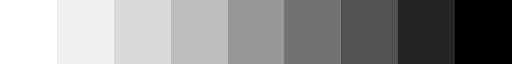

In [12]:
cmap

In [13]:
custom_palette = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

In [14]:
custom_palette=custom_palette[2:-2]

In [15]:
categories = {'asw_batch': 'Batch removal',
 'asw_batch_cosine': 'Batch removal',
 'asw_batch_mean_other': 'Batch removal',
 'asw_batch_mean_other_cosine': 'Batch removal',
 'asw_batch_furthest': 'Batch removal',
 'asw_batch_furthest_cosine': 'Batch removal',
 'iLISI_batch': 'Batch removal',
 'cLISI_full': 'Bio-conservation',
 'CiLISI_batch': 'Batch removal',
 'asw_label': 'Bio-conservation',
 'asw_label_cosine': 'Bio-conservation',
 'nmi': 'Bio-conservation',
 'ari': 'Bio-conservation'}

In [16]:
metric_mapping = {'asw_batch': 'silhouette-based \n batch removal metric \n (Batch ASW)',\
                               'asw_batch_cosine': 'Batch ASW (cosine)',\
                               'asw_batch_mean_other': 'BRAS (euclidean)',\
                                'asw_batch_mean_other_cosine': 'BRAS',\
                                'asw_batch_furthest': 'BRAS (furthest, euclidean)',\
                                'asw_batch_furthest_cosine': 'BRAS (furthest, cosine)',\
                                'iLISI_batch': 'iLISI',\
                                'cLISI_full': 'cLISI',\
                                'CiLISI_batch': 'CiLISI',\
                                'asw_label': 'Cell type ASW',\
                                'asw_label_cosine': 'Cell type ASW (cosine)',\
                                'nmi': 'NMI cluster/label',\
                                'ari': 'ARI cluster/label'
                               }

In [17]:
scores = pd.read_csv("evaluation/batch_removal_scores.csv", index_col=0)

In [18]:
scores = scores.T

In [19]:
scores

,asw_batch,asw_batch_cosine,asw_batch_mean_other,asw_batch_mean_other_cosine,asw_batch_furthest,asw_batch_furthest_cosine,iLISI_batch,cLISI_full,CiLISI_batch,asw_label,asw_label_cosine,nmi,ari
Overcorrected,0.993250,0.990154,0.994599,0.992678,0.992805,0.990485,0.779334,0.291609,0.776595,0.498388,0.498835,0.006532,0.000292
None,0.993038,0.989877,0.994812,0.992166,0.993199,0.989480,0.780233,0.721169,0.783159,0.523401,0.542321,0.808778,0.891168
Mild,0.993213,0.989834,0.982046,0.964275,0.970899,0.943966,0.700693,0.738715,0.706151,0.523963,0.547117,0.802031,0.773971
Intermediate,0.993096,0.990327,0.962877,0.925486,0.942532,0.888737,0.489355,0.834451,0.496775,0.524827,0.545812,0.799670,0.773368
Strong,0.994865,0.990636,0.937804,0.876157,0.907778,0.822280,0.334565,0.787153,0.338386,0.523369,0.543698,0.570391,0.450946


In [20]:
scores = scores.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')


In [21]:
scores = scores.rename(columns={'index': 'Scenario'})

In [22]:
scores['Scenario'] = scores['Scenario'].astype('category')

In [23]:
scores['Scenario'] = scores['Scenario'].cat.reorder_categories(['Strong', 'Intermediate', 'Mild', 'None', 'Overcorrected'], ordered=True)

In [24]:
scores['Category'] = scores['Metric'].map(categories)

In [25]:
bio_scores = scores[scores['Category'] == 'Bio-conservation']

In [26]:
bio_scores['Metric'] = bio_scores['Metric'].map(metric_mapping)

/tmp/7431749.1.gpu.q/ipykernel_17084/2146692233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bio_scores['Metric'] = bio_scores['Metric'].map(metric_mapping)


In [27]:
batch_scores = scores[scores['Category'] == 'Batch removal']

In [28]:
batch_scores['Metric'] = batch_scores['Metric'].map(metric_mapping)

/tmp/7431749.1.gpu.q/ipykernel_17084/2892087235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_scores['Metric'] = batch_scores['Metric'].map(metric_mapping)


In [29]:
# Metrics main figure

In [30]:
plt.rcParams["axes.linewidth"] = 1
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1


In [31]:
batch_scores_main = batch_scores[(batch_scores['Metric'] == 'silhouette-based \n batch removal metric \n (Batch ASW)') | 
                                 (batch_scores['Metric'] == 'BRAS') | 
                                 (batch_scores['Metric'] == 'CiLISI')]


In [32]:
plt.rcParams["figure.figsize"] = (80*mm, 3/8*80*mm)


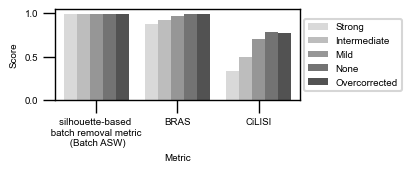

In [33]:
g = sns.barplot(data=batch_scores_main, x='Metric', y='Score', hue='Scenario', palette=custom_palette)
plt.xticks(rotation=0)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('figures/{}_main_batch_removal.png'.format(use_case), format='png', dpi=600, bbox_inches='tight')

In [34]:
plt.rcParams["figure.figsize"] = (1/3*80*mm, 3/8*80*mm)

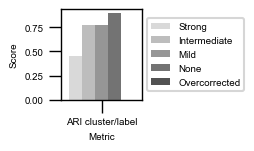

In [35]:
g = sns.barplot(data=bio_scores[bio_scores['Metric'] == 'ARI cluster/label'], x='Metric', y='Score', hue='Scenario', palette=custom_palette)
plt.xticks(rotation=0)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('figures/{}_main_bio_cons.png'.format(use_case), format='png', dpi=600, bbox_inches='tight')

In [36]:
# All metrics supplement

In [37]:
plt.rcParams["figure.figsize"] = (8/13*150*mm, 3/8*80*mm)

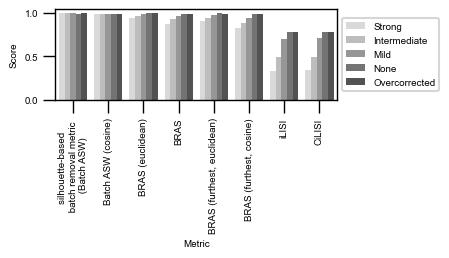

In [38]:
g = sns.barplot(data=batch_scores, x='Metric', y='Score', hue='Scenario', palette=custom_palette)
plt.xticks(rotation=90)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('figures/{}_supp_batch_removal.png'.format(use_case), format='png', dpi=600, bbox_inches='tight')

In [39]:
plt.rcParams["figure.figsize"] = (5/13*150*mm, 3/8*80*mm)

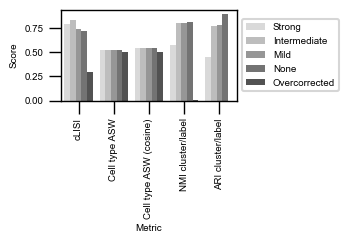

In [40]:
g = sns.barplot(data=bio_scores, x='Metric', y='Score', hue='Scenario', palette=custom_palette)
plt.xticks(rotation=90)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('figures/{}_supp_bio_cons.png'.format(use_case), format='png', dpi=600, bbox_inches='tight')

In [41]:
print("Default font size:", plt.rcParams['font.size'])
print("Title font size:", plt.rcParams['axes.titlesize'])
print("Axes label font size:", plt.rcParams['axes.labelsize'])
print("X-tick label font size:", plt.rcParams['xtick.labelsize'])
print("Y-tick label font size:", plt.rcParams['ytick.labelsize'])
print("Legend font size:", plt.rcParams['legend.fontsize'])


Default font size: 7.0
Title font size: 18.0
Axes label font size: 7.0
X-tick label font size: 7.0
Y-tick label font size: 7.0
Legend font size: 7.0
